In [1]:
import numpy as np
import pandas as pd
import math
import pylab
import matplotlib.pyplot as plt
import random

from numpy import arange
from numpy import meshgrid
from matplotlib import mlab
from sys import stdin
from copy import deepcopy

In [2]:
class Matrix:
    
# ИНИЦИАЛИЗАЦИЯ
    def __init__(self, matrix, LU=False, history=False):
        self.matrix = deepcopy(matrix)
        self.size = self._Size()
        if LU == True:
            self.LU, self.P, self.p = self._LUP(history)
        else:
            self.LU = None
            self.P = None
            self.p = 0
        
# ПЕЧАТЬ МАТРИЦЫ
    def __str__(self):
        return '\n'.join([''.join(['%f\t' % i for i in row]) for
                          row in self.matrix])
# РАЗМЕР МАТРИЦЫ
    def _Size(self):
        rows = len(self.matrix)
        cols = 0
        for row in self.matrix:
            if (type(row) == int) | (type(row) == float):
                break
            if len(row) > cols:
                cols = len(row)
        return (rows, cols)
    
# LUP РАЗЛОЖЕНИЕ
    def _LUP(self, history=False):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
    
        P = [i for i in range(self.size[0])]
        LU = self
        p = 0
 
        for k in range(self.size[0]):
            m = 0
            row, col = LU.Max_by_axis(k)
            if (row != k) & (LU.matrix[row][col] != 0):
                p += 1
            if LU.matrix[row][col] == 0:
                raise Exception("Столбец нулевой")
            P[k], P[row] = P[row], P[k]
            LU = Matrix.Permutation(row, col, self.size[0]).Multiply(LU)
            for i in range(k + 1, self.size[0]):
                LU.matrix[i][k] = LU.matrix[i][k] / LU.matrix[k][k]
                for j in range(k + 1, self.size[0]):
                    LU.matrix[i][j] = LU.matrix[i][j] - LU.matrix[i][k] * LU.matrix[k][j] 
            
        if history == True:
            print("P:\n{}".format(P))
        return LU, P, p

# LU
    def LU_(self, history=False):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
            
        L = Matrix.E(self.size[0])
        U = Matrix.E(self.size[0])
        
        for i in range(self.size[0]):
            U.matrix[i][i] = self.LU.matrix[i][i]
            for j in range(self.size[0]):
                if (j < i):
                    L.matrix[i][j] = self.LU.matrix[i][j]
                else:
                    U.matrix[i][j] = self.LU.matrix[i][j]
        
        if history == True:
            print("L:\n{}".format(L))
            print("U:\n{}".format(U))
            print("LU:\n{}".format(L.Multiply(U)))
        return L, U

# УМНОЖЕНИЕ   
    def Multiply(self, m):
        if self.size[1] != m.size[0]:
            raise Exception("Несоответствие размерностей: {0} {1}".format(self.size, m.size))
        #print(res.size)
        res = []
        rows = []
        #for i, row in enumerate(self.matrix):
        for i in range(self.size[0]):
            for j in range(m.size[1]):
            #for j, col in enumerate(row):
                val = 0
                for k in range(self.size[1]):
                    val += self.matrix[i][k] * m.matrix[k][j]                
                rows.append(val)    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# СУММА   
    def Sum(self, m):
        if self.size != m.size:
            raise Exception("Несоответствие размерностей: {0} {1}".format(self.size, m.size))
        res = []
        rows = []
        for i, row in enumerate(self.matrix):
            for j, col in enumerate(row):
                rows.append(self.matrix[i][j] + m.matrix[i][j])    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# УМНОЖЕНИЕ НА ЧИСЛО   
    def MultiNum(self, n):
        res = []
        rows = []
        for i, row in enumerate(self.matrix):
            for j, col in enumerate(row):
                rows.append(n * self.matrix[i][j])    
            res.append(rows)
            rows = []
        return Matrix(res)
    
# МАКСИМАЛЬНЫЙ ЭЕЛЕМЕНТ СРОКИ ИЛИ СТОЛБЦА ПО МОДУЛЮ  
    def Max_by_axis(self, num, axis=1):
        m = 0
        num = num
        if axis == 1:
            for i in range(num, self.size[0]):
                if abs(self.matrix[i][num]) > m:
                    m = self.matrix[i][num]
                    row = i
                    col = num
        elif axis == 0:
            for i in range(self.size[1]):
                if abs(self.matrix[num][i]) > m:
                    m = self.matrix[num][i]
                    row = num
                    col = i
        else:
            raise Exception("Недопустимое значение axis")
        return row, col
    
# МАКСИМАЛЬНЫЙ ЭЛЕМЕНТ МАТРИЦЫ    
    def Max(self):
        m = -10000000000
        for i in range(self.size[0]):
            for j in range(self.size[1]):
                if abs(self.matrix[i][j]) > m:
                    m = self.matrix[i][j]
        return m
    
# ОПРЕДЕЛИТЕЛЬ
    def Det(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
        if self.LU == None:
            self.LU, self.P, self.p = self._LUP()
        det = pow(-1, self.p)
        for k in range(self.size[0]):
            det *= self.LU.matrix[k][k]
        return det
            
# ОБРАТНАЯ МАТРИЦА
    def Reverse(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
        if self.LU == None:
            self.LU, self.P, self.p = self._LUP()
        det = self.Det()
        if det == 0:
            raise Exception("Определитель равен 0")
        res = []
        for k in range(self.size[0]):
            res.append(Gauss_LU(self, e(k, self.size[0])))
        return Matrix(res).Transpose()
    
# ТРАНСПОНИРОВАНИЕ
    def Transpose(self):
        res = self
        if self.size[0] == self.size[1]:
            for i in range(self.size[0]):
                for j in range(i + 1, self.size[0]):
                    a = res.matrix[i][j]
                    res.matrix[i][j] = res.matrix[j][i]
                    res.matrix[j][i] = a
            return res
        else:
            res = []            
            for i in range(self.size[1]):
                rows = []
                for j in range(self.size[0]):
                    rows.append(self.matrix[j][i])
                res.append(rows)
            return Matrix(res)
        
# РАВЕНСТВО МАТРИЦ
    def Equal(A, B):
        if (A.size[0] != B.size[0]) | (A.size[1] != B.size[1]):
            return False
        else:
            for i in range(A.size[0]):
                for j in range(A.size[1]):
                    if A.matrix[i][j] != B.matrix[i][j]:
                        return False
            return True
        
# СИММЕТРИЧНОСТЬ МАТРИЦЫ
    def Simmetric(m):
        if m.size[0] != m.size[1]:
            return False
        else:
            for i in range(m.size[0]):
                for j in range(i + 1, m.size[1]):
                    if m.matrix[i][j] != m.matrix[j][i]:
                        return False
            return True
    
##################  СТАТИЧЕСКИЕ  #######################

# ЕДИНИЧНАЯ МАТРИЦА
    def E(n):
        e = []
        rows = []
        for i in range(n):
            for j in range(n):
                if i == j:
                    rows.append(1)
                else:
                    rows.append(0)
            e.append(rows)
            rows = []
        return Matrix(e)

# НУЛЕВАЯ МАТРИЦА   
    def Zero(n):
        z = []
        rows = []
        for i in range(n):
            for j in range(n):
                rows.append(0)
            e.append(rows)
            rows = []
        return Matrix(z)
    
# МАТРИЦА ПЕРЕСТАНОВОК   
    def Permutation(row_col_1, row_col_2, n):
        if (row_col_1 > n) | (row_col_2 > n):
            raise Exception("Индексы за пределами массива")
        row_col_1 = row_col_1
        row_col_2 = row_col_2
        p = []
        rows = []
        for i in range(n):
            for j in range(n):
                if ((i == row_col_1) & (j == row_col_2)) | ((i == row_col_2) & (j == row_col_1)):
                    rows.append(1)
                elif (i == j) & ((i != row_col_1) & (j != row_col_2) & (i != row_col_2) & (j != row_col_1)):#(flag == True):
                    rows.append(1)                    
                else:
                    rows.append(0)
            p.append(rows)
            rows = []
        return Matrix(p)

# ВЕКТОР НАПРАВЛЕНИЯ
def e(i, n):
    e = []
    for j in range(n):
        if j == i:
            e.append(1)
        else:
            e.append(0)
    #return Matrix(e)
    return e


In [3]:
def Progonka(A, b):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений")   
    X = [0] * A.size[0]
    P = [0] * A.size[0]
    Q = [0] * A.size[0]
    P[0] = -A.matrix[0][1] / A.matrix[0][0]
    Q[0] = b[0] / A.matrix[0][0]
    for i in range(1, A.size[0]):
        if i != A.size[0] - 1:
            P[i] = -A.matrix[i][i + 1] / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b[i] - Q[i - 1] * A.matrix[i][i - 1]) / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
    for i in range(A.size[0] - 1, -1, -1):
        if i != A.size[0] - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    return X
        

In [4]:
def Gauss_LU(A, b, history=False):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений") 
    L, U = A.LU_(history)
    
    x = [0] * A.size[0]
    z = [0] * A.size[0]
    n = A.size[0] 
    
    for i in range(n):
        summ = 0
        for j in range(i):
            summ += L.matrix[i][j] * z[j]
 
        z[i] = b[A.P[i]] - summ
    
    for i in range(n - 1, -1, -1):
        summ = 0
        for j in range(i + 1, n):
            summ += U.matrix[i][j] * x[j]
 
        x[i] = (z[i] - summ) / U.matrix[i][i]
    return x

# Часть 1

In [5]:
def f(x):
    return math.sin(x)

pi = math.pi

X_a = np.array([0.1 * pi, 0.2 * pi, 0.3 * pi, 0.4 * pi])
X_b = np.array([0.1 * pi, pi / 6, 0.3 * pi, 0.4 * pi])
X = pi / 4

In [6]:
def omega(x, X):
    w = 1
    for i in range(len(X)):
        w *= (x - X[i])
    return w

def omega_(x, X):
    w = 1
    for i in range(len(X)):
        if X[i] != x:
            w *= (x - X[i])
    return w

def L(x, X):
    l = 0
    for i in range(len(X)):
        l += (f(X[i]) * omega(x, X)) / ((x - X[i]) * omega_(X[i], X))
    return l

In [7]:
print("МНОГОЧЛЕН ЛАГРАНЖА\n")
print("а)\tf(x*) = {0}\n\tL(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), L(X, X_a), f(X) - L(X, X_a)))
print("б)\tf(x*) = {0}\n\tL(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), L(X, X_b), f(X) - L(X, X_b)))

МНОГОЧЛЕН ЛАГРАНЖА

а)	f(x*) = 0.7071067811865475
	L(x*) = 0.7069466693335428
	Погрешность: 0.00016011185300468522

б)	f(x*) = 0.7071067811865475
	L(x*) = 0.7068457655581606
	Погрешность: 0.00026101562838687364



In [8]:
def X_new(i, k, X):
    return [X[j] for j in range(i, k)]

def separate(X):
    if len(X) == 2:
        return (f(X[0]) - f(X[1])) / (X[0] - X[1])
    else:
        return (separate(X_new(0, len(X) - 1, X)) - separate(X_new(1, len(X), X))) / (X[0] - X[len(X) - 1])

def xxx(x, i, X):
    res = 1
    for j in range(i):
        res *= (x - X[j])
    return res
    
def P(x, X):
    p = f(X[0])
    for i in range(1, len(X)):
        X_ = X_new(0, i + 1, X)
        p += xxx(x, i, X) * separate(X_)
    return p

In [9]:
print("МНОГОЧЛЕН НЬЮТОНА\n")
print("а)\tf(x*) = {0}\n\tP(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), P(X, X_a), f(X) - P(X, X_a)))
print("б)\tf(x*) = {0}\n\tP(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), P(X, X_b), f(X) - P(X, X_b)))

МНОГОЧЛЕН НЬЮТОНА

а)	f(x*) = 0.7071067811865475
	P(x*) = 0.7069466693335428
	Погрешность: 0.00016011185300468522

б)	f(x*) = 0.7071067811865475
	P(x*) = 0.7068457655581607
	Погрешность: 0.0002610156283867626



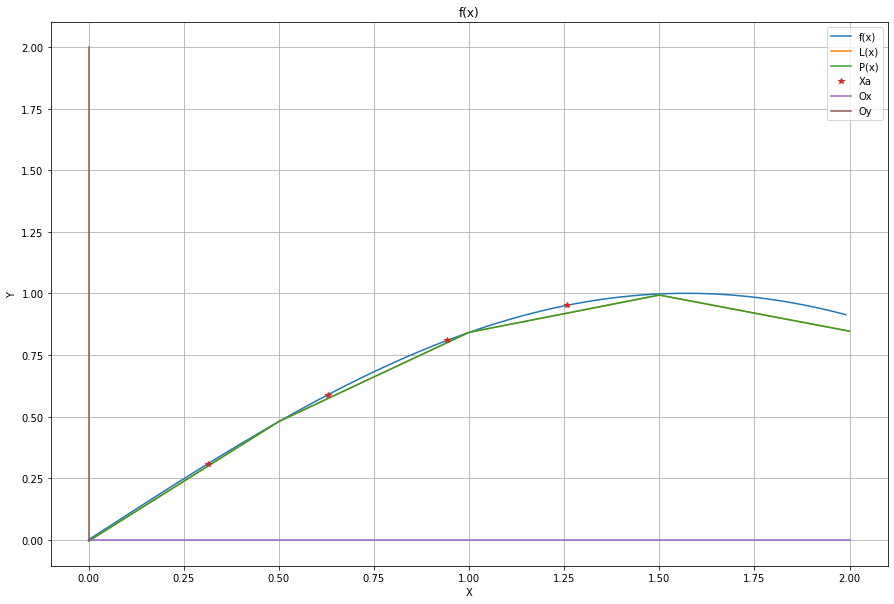

In [10]:
# ГРАФИК ФУНКЦИИ
xmin = 0
xmax = 2
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

y_X_a = [f(x) for x in X_a]

Larr = np.array([0, 0.5, 1, 1.5, 2])
Llist = [L(x, X_a) for x in Larr]

Parr = np.array([0, 0.5, 1, 1.5, 2])
Plist = [P(x, X_a) for x in Parr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x)')
plt.plot(xarr, ylist)
plt.plot(Larr, Llist)
plt.plot(Parr, Plist)
plt.plot(X_a, y_X_a, '*')
plt.plot([0, 2], [0, 0])
plt.plot([0, 0], [0, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f(x)', 'L(x)', 'P(x)', 'Xa', 'Ox', 'Oy'])
plt.show()

# Часть 2

In [11]:
def S(x, X, F):
    if len(X) != len(F):
        raise Exception("Несовпадение размерностей")
        
    h = []
    n = len(X)
    
    for i in range(1, n):
        h.append(X[i] - X[i - 1])
        
    c_syst = []
    rows = []
    
    for i in range(n - 2):
        if i == 0:
            rows.append(2 * (h[i] + h[i + 1]))
        elif i == 1:
            rows.append(h[i])
        else:
            rows.append(0)
            
    c_syst.append(rows)
        
    for i in range(1, n - 3):
        rows = []
        for j in range(n - 2):
            if i - 1 == j:
                rows.append(h[i])
            elif i == j:
                rows.append(2 * (h[i - 1] + h[i]))
            elif i + 1 == j:
                rows.append(h[i])
            else:
                rows.append(0)
        c_syst.append(rows)
    
    rows = []
    
    for i in range(2, n):
        if i == n - 2:
            rows.append(h[i])
        elif i == n - 1:
            rows.append(2 * (h[i - 2] + h[i - 1]))
        else:
            rows.append(0)
            
    c_syst.append(rows)        
    b = []    
    
    for i in range(2, n):
        b.append(3 * ((F[i] - F[i - 1]) / h[i - 1] - (F[i - 1] - F[i - 2]) / h[i - 2]))
    
    c = [0] + Progonka(Matrix(c_syst), b)
    
    a = []
    b = []
    d = []
    
    for i in range(n - 1):
        a.append(F[i])
        if i == n - 2:
            b.append((F[i + 1] - F[i]) / h[i] - (2 / 3) * h[i] * c[i])
            d.append(- c[i] / (3 * h[i]))
        else:
            b.append((F[i + 1] - F[i]) / h[i] - (1 / 3) * h[i] * (c[i + 1] + 2 * c[i]))
            d.append((c[i + 1] - c[i]) / (3 * h[i]))
    
    for i in range(n - 1):
        if (x >= X[i]) & (x <= X[i + 1]):
            res = a[i] + b[i] * (x - X[i]) + c[i] * (x - X[i]) ** 2 + d[i] * (x - X[i]) ** 3
            break
    return res

X = np.array([0., 1., 2., 3., 4.])
F = np.array([1., 0.86603, 0.5, 0., -0.5])
x = 1.5

In [12]:
print('f(x*) = {}'.format(S(x, X, F)))

f(x*) = 0.7108741517857143


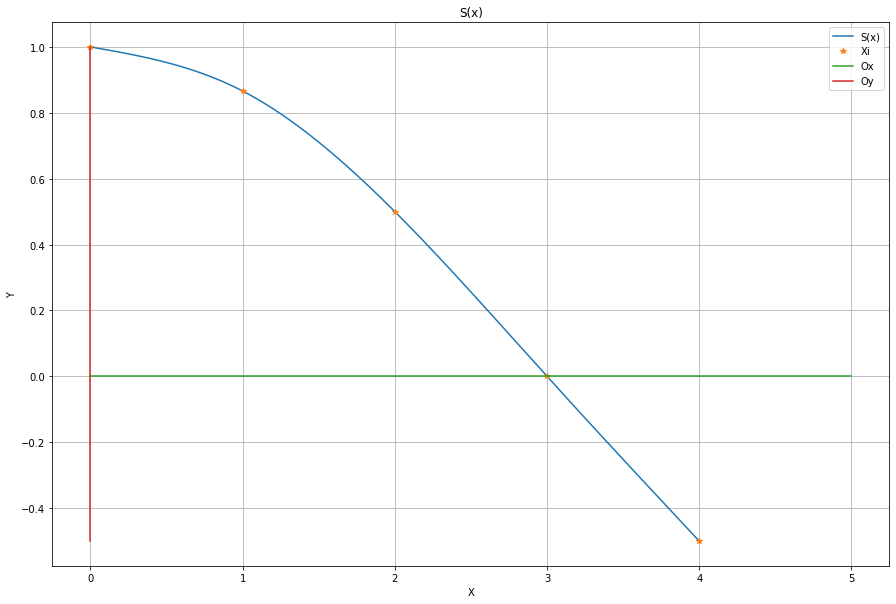

In [13]:
# ГРАФИК ФУНКЦИИ
xmin = 0
xmax = 4
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [S(x_, X, F) for x_ in xarr]


fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('S(x)')
plt.plot(xarr, ylist)
plt.plot(X, F, '*')
plt.plot([0, 5], [0, 0])
plt.plot([0, 0], [-0.5, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['S(x)', 'Xi', 'Ox', 'Oy'])
plt.show()

# Часть 3

In [14]:
def MNK(X, Y, n):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    A = []
    b = []
    
    for i in range(n + 1):
        rows = []
        for j in range(n + 1):
            rows.append(sum([x ** (i + j) for x in X]))
        A.append(rows)
        b.append(sum([Y[k] * X[k] ** i for k in range(len(Y))]))
    
    a = Gauss_LU(Matrix(A, LU=True), b)
    return lambda x: sum([a[i] * x ** i for i in range(n + 1)])

def err(f, X, Y):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    return sum([(f(X[i]) - Y[i]) ** 2 for i in range(len(X))])

X = np.array([-1, 0, 1, 2, 3, 4])
Y = np.array([0.86603, 1, 0.86603, 0.5, 0, -0.5])

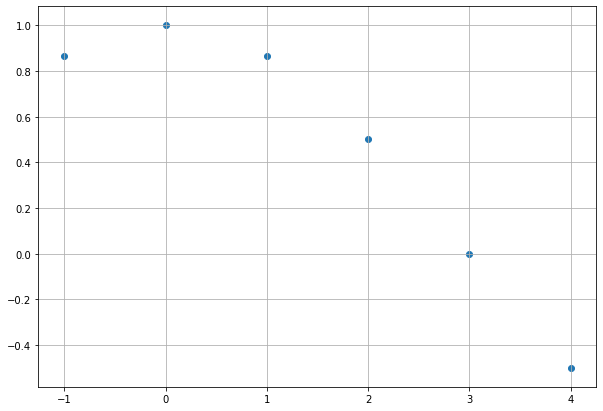

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y)
plt.grid()
plt.show()

In [16]:
f_1 = MNK(X, Y, 1)
f_2 = MNK(X, Y, 2)

xmin = -1
xmax = 4
dx = 0.01

xarr = np.arange(xmin, xmax, dx)

Standard deviation of f_1(x) is 0.27081794892761896


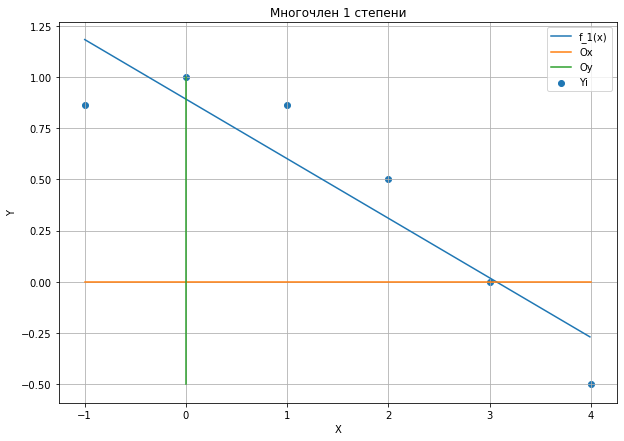

In [17]:
print("Standard deviation of f_1(x) is {}".format(err(f_1, X, Y)))

ylist = [f_1(x) for x in xarr]

plt.figure(figsize=(10,7))
plt.title("Многочлен 1 степени")
plt.grid()
plt.scatter(X, Y)
plt.plot(xarr, ylist)
plt.plot([-1, 4], [0, 0])
plt.plot([0, 0], [-0.5, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f_1(x)', 'Ox', 'Oy', 'Yi'])
plt.show()

Standard deviation of f_2(x) is 0.01517892558357143


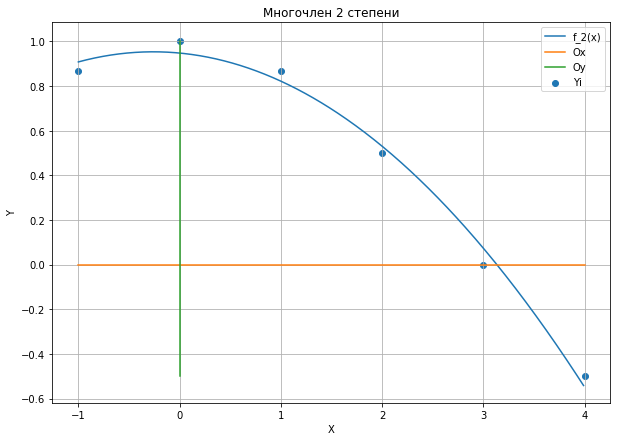

In [18]:
print("Standard deviation of f_2(x) is {}".format(err(f_2, X, Y)))

ylist = [f_2(x) for x in xarr]

plt.figure(figsize=(10,7))
plt.title("Многочлен 2 степени")
plt.grid()
plt.scatter(X, Y)
plt.plot(xarr, ylist)
plt.plot([-1, 4], [0, 0])
plt.plot([0, 0], [-0.5, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f_2(x)', 'Ox', 'Oy', 'Yi'])
plt.show()

# Часть 4

In [19]:
def diff(x, X, Y):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    
    for i in range(len(X) - 1):
        if (x >= X[i]) & (x <= X[i + 1]):
            if (x == X[i]) & (i != 0):
                left = (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
                right = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                
                mean = (left + right) / 2
                
                print('Левая производная: {}'.format(left))
                print('Правая производная: {}'.format(right))
                print('Среднее: {}'.format(mean))
                
            elif (x == X[i + 1]) & (i != len(X) - 1):
                left = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                right = (Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1])
                
                mean = (left + right) / 2
                
                print('Левая производная: {}'.format(left))
                print('Правая производная: {}'.format(right))
                print('Среднее: {}'.format(mean))
            else:
                df_1 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                
                print('1-я производная от функции первой степени: {}'.format(df_1))
            df_2 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) + (((Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1]) - (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])) / (X[i + 2] - X[i])) * (2 * x - X[i] - X[i + 1])
            ddf = 2 * (((Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1]) - (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])) / (X[i + 2] - X[i]))
            
            print('1-я производная от функции второй степени степени: {}'.format(df_2))
            print('2-я производная от функции второй степени степени: {}'.format(ddf))
            break
            

X = np.array([-1., 0., 1., 2., 3.])
Y = np.array([-0.5, 0., 0.5, 0.86603, 1])
x = 1.

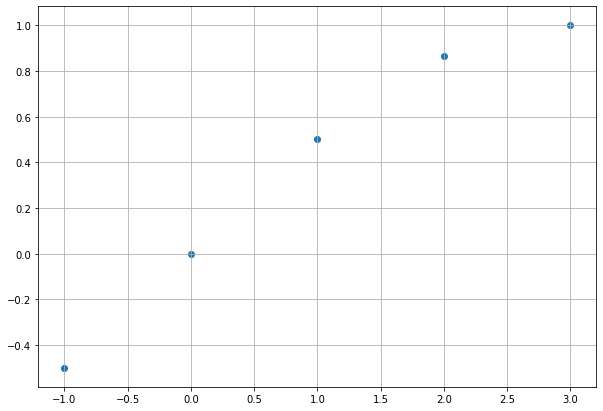

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y)
plt.grid()
plt.show()

In [21]:
diff(x, X, Y)

Левая производная: 0.5
Правая производная: 0.36602999999999997
Среднее: 0.433015
1-я производная от функции второй степени степени: 0.433015
2-я производная от функции второй степени степени: -0.13397000000000003


# Часть 5

In [22]:
def y(x):
    return x / ((3 * x + 4) ** 2)

x0 = 0
x1 = 4
h1 = 1.
h2 = 0.5
p = 2

In [23]:
def rectangle(x0, x1, f, h):
    X = np.arange(x0, x1, h)
    return h * sum([f(X[i] + h / 2) for i in range(len(X))])

def trapeze(x0, x1, f, h):
    X = np.arange(x0, x1, h)
    return h * ((f(X[0]) + f(x1)) / 2 + sum([f(X[i]) for i in range(1, len(X))]))

def Simpson(x0, x1, f, h):
    res = 0
    x = x0 + h
    while x < x1:
        res += f(x - h) + 4 * f(x) + f(x + h)
        x += 2 * h
    return (h / 3) * res

def RRR(F1, F2, h1, h2, p):
    if h1 < h2:
        return F1 + (F1 - F2) / ((h2 / h1) ** p - 1)
    return F2 + (F2 - F1) / ((h1 / h2) ** p - 1)

In [24]:
p1 = rectangle(x0, x1, y, h1)
t1 = trapeze(x0, x1, y, h1)
s1 = Simpson(x0, x1, y, h1)

p2 = rectangle(x0, x1, y, h2)
t2 = trapeze(x0, x1, y, h2)
s2 = Simpson(x0, x1, y, h2)

rp = RRR(p1, p2, h1, h2, p)
rt = RRR(t1, t2, h1, h2, p)
rs = RRR(s1, s2, h1, h2, p)

In [25]:
print('h1 = {}'.format(h1))
print("Прямоугольник: {}".format(p1))
print("Трапеция: {}".format(t1))
print("Симпсон: {}".format(s1))

h1 = 1.0
Прямоугольник: 0.07284061196629331
Трапеция: 0.06597214255524694
Симпсон: 0.0694211900736626


In [26]:
print('h2 = {}'.format(h2))
print("Прямоугольник: {}".format(p2))
print("Трапеция: {}".format(t2))
print("Симпсон: {}".format(s2))

h2 = 0.5
Прямоугольник: 0.0713276669809035
Трапеция: 0.06940637726077012
Симпсон: 0.07055112216261118


In [27]:
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для прямоугольника: {0};\nПогрешность: {1} и {2}'.format(rp, abs(rp - p1), abs(rp - p2)))
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для трапеции: {0};\nПогрешность: {1} и {2}'.format(rt, abs(rt - t1), abs(rt - t2)))
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для Симпсона: {0};\nПогрешность: {1} и {2}'.format(rp, abs(rs - s1), abs(rs - s2)))


Точное значение по Рунге-Ромбергу-Ридчардсону для прямоугольника: 0.07082335198577355;
Погрешность: 0.002017259980519756 и 0.0005043149951299425

Точное значение по Рунге-Ромбергу-Ридчардсону для трапеции: 0.07055112216261118;
Погрешность: 0.004578979607364239 и 0.0011447449018410633

Точное значение по Рунге-Ромбергу-Ридчардсону для Симпсона: 0.07082335198577355;
Погрешность: 0.001506576118598113 и 0.00037664402964952826
